# Statistics Challenge (Optional)

Use the `orders.csv` dataset in the same directory to complete this challenge.

**Background**:

There are exactly 100 sneaker shops on a sneaker retailing website, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

**Questions**:

- What went wrong with this metric (AOV) and the current analysis in general. Support your answers with appropriate visualizations.

- Propose a new metric that better represents the behavior of the stores' customers. Why are these metrics better and what are their values?

- Using the `created_at` column as a proxy for the date and time of order creation, provide a brief analysis of the trends in the customers' purchasing behavior.

Show all of your work in this notebook.

In [101]:
import numpy as np; import pandas as pd; import matplotlib.pyplot as plt; import seaborn as sns; from sklearn.preprocessing import StandardScaler

dataframe = pd.read_csv(r"C:\Users\Tomjl\OneDrive\Desktop\Py_notebooks_scripts\MDST\2023-Tutorials\Optional Challenges\Statistics Focus\orders.csv", sep=",")
dataframe.head(10)
dataframe['order_value'].max()
#max returns 704000
dataframe['order_value'].std()
#std returns 41282
print(f""" **********Current values:*****************
Max value: {dataframe['order_value'].max()}
Mean value: {dataframe['order_value'].mean()} and
Standard Devation: {dataframe['order_value'].std()} 
""")
dataframe['normalize'] = (dataframe['order_value']-dataframe['order_value'].mean())/dataframe['order_value'].std()
dataframe['new'] = dataframe['normalize'].apply(lambda x: x if abs(x) <= 3.0 else np.nan)
dataframe['normalize'].max()
# returns a z score of >16
dataframe_drop = dataframe.dropna(0 ,inplace=False)
print(f""" ********* New Values: *************
Mean_New: {dataframe_drop['order_value'].mean()}
Standard Devaition {dataframe_drop['order_value'].std()}
""")

 **********Current values:*****************
Max value: 704000
Mean value: 3145.128 and
Standard Devation: 41282.539348788196 

 ********* New Values: *************
Mean_New: 723.2617422721798
Standard Devaition 4848.500488345066



C:\Users\Tomjl\AppData\Local\Temp\ipykernel_2228\1118326643.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  dataframe_drop = dataframe.dropna(0 ,inplace=False)


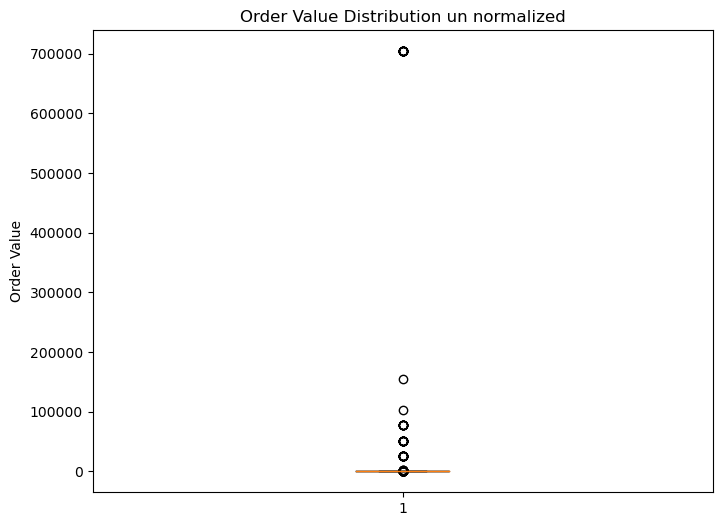

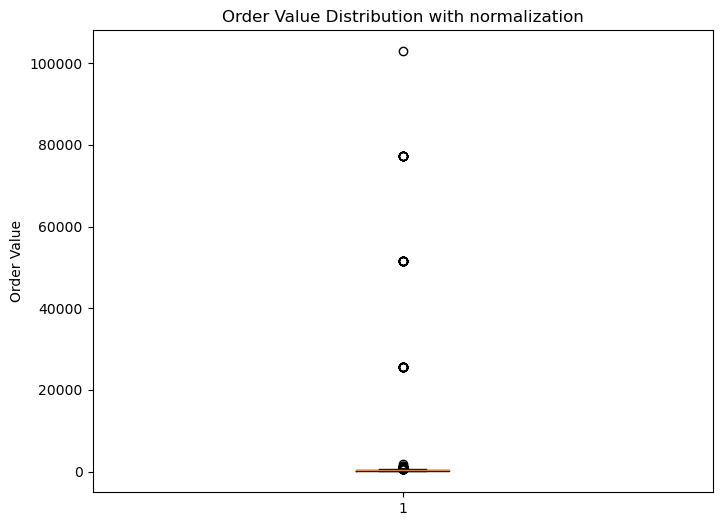

In [108]:
dataframe_drop.max()
plt.figure(figsize=(8, 6))
plt.boxplot(dataframe['order_value'])
plt.title('Order Value Distribution un normalized')
plt.ylabel('Order Value')
plt.show()
plt.figure(figsize=(8, 6))
plt.boxplot(dataframe_drop['order_value'])
plt.title('Order Value Distribution with normalization')
plt.ylabel('Order Value')
plt.show()

What is happening above, is the fallacy of "Harvard Drop outs make more on average then Harvard Graduates". Harvard dropouts are fewer then harvard graduates, and more importantly include billionaires of Bill Gates and Mark Zuckenburg. 

Note that the spread is still very large. We can begin to controll for the ranges, by adjusting to the percentiles of the customers we want to view. 

In [103]:
def Z_score(pass_in, df): 
    """
    takes a score precentile and dataframe and returns the order_values with in that percentile:
    """
    df['new'] = df['normalize'].apply(lambda x: x if abs(x) <= pass_in else np.nan)
    df_out = df.dropna(0, inplace = False)
    return df_out

In [104]:
test_df = Z_score(1, dataframe_drop)
test_df.max()

C:\Users\Tomjl\AppData\Local\Temp\ipykernel_2228\132902812.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new'] = df['normalize'].apply(lambda x: x if abs(x) <= pass_in else np.nan)
C:\Users\Tomjl\AppData\Local\Temp\ipykernel_2228\132902812.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df_out = df.dropna(0, inplace = False)


order_id                        5000
shop_id                          100
user_id                          999
order_value                    25725
total_items                        8
payment_method                 debit
created_at        2017-03-30 9:55:00
normalize                   0.546959
new                         0.546959
dtype: object

C:\Users\Tomjl\AppData\Local\Temp\ipykernel_2228\132902812.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df_out = df.dropna(0, inplace = False)


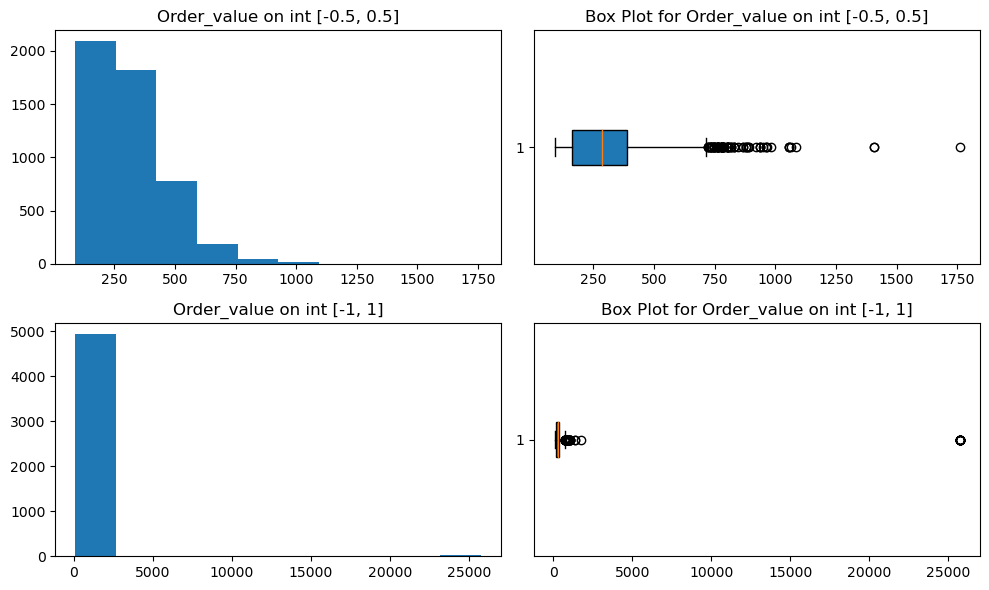

In [111]:
small_margin = Z_score(.5, dataframe)
zequals1 = Z_score(1, dataframe)
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))
ax[0, 0].hist(x=small_margin['order_value'])
ax[0, 0].set_title("Order_value on int [-0.5, 0.5]")
ax[0, 1].boxplot(small_margin['order_value'], vert=False, patch_artist=True)
ax[0, 1].set_title("Box Plot for Order_value on int [-0.5, 0.5]")
ax[1, 0].hist(x=zequals1['order_value'])
ax[1, 0].set_title("Order_value on int [-1, 1]")
ax[1, 1].boxplot(zequals1['order_value'], vert=False, patch_artist=True)
ax[1, 1].set_title("Box Plot for Order_value on int [-1, 1]")
plt.tight_layout()
plt.show()

We see that a large number of purchases are for relatively small amounts, were veqry common while more uncommon very large purchases dominate the sample statistics. Other methods like using measures of location can be emplyeed here to deal with these values, dependant on where researchers would like to take the study